In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()
# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['0P00005V63.BO', '0P0000MLHH.BO', 'MSFT', 'AMZN']

# Set up End and Start times for data grab

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
i = 1
for stock in tech_list:
    val = 'f' + str(i)
    globals()[val] = yf.download(stock, start='2012-01-01', end=datetime.now())
    i = i + 1
    
a = yf.download('0P00005V63.BO', start, end)
print("hii")
#print(val)
#print(f4)
company_list = ['']*(i-1)
k=1
for x in company_list:
    company_list[k-1] = eval('f' + str(k))
    k = k + 1 
#print(company_list)
company_name = ["Aditya Birla Sun Life Frontline Equity Fund", "Axis Bluechip Fund", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(300)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
hii


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2018-01-01,221.289993,221.289993,221.289993,221.289993,221.289993,0,Aditya Birla Sun Life Frontline Equity Fund
2018-01-02,221.029999,221.029999,221.029999,221.029999,221.029999,0,Aditya Birla Sun Life Frontline Equity Fund
2018-01-03,221.169998,221.169998,221.169998,221.169998,221.169998,0,Aditya Birla Sun Life Frontline Equity Fund
2018-01-04,222.740005,222.740005,222.740005,222.740005,222.740005,0,Aditya Birla Sun Life Frontline Equity Fund
2018-01-05,224.020004,224.020004,224.020004,224.020004,224.020004,0,Aditya Birla Sun Life Frontline Equity Fund
...,...,...,...,...,...,...,...
2019-03-14,221.029999,221.029999,221.029999,221.029999,221.029999,0,Aditya Birla Sun Life Frontline Equity Fund
2019-03-15,222.710007,222.710007,222.710007,222.710007,222.710007,0,Aditya Birla Sun Life Frontline Equity Fund
2019-03-18,223.110001,223.110001,223.110001,223.110001,223.110001,0,Aditya Birla Sun Life Frontline Equity Fund


In [2]:
f1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.0
mean,336.726169,336.726169,336.726169,336.726169,336.726169,0.0
std,16.788836,16.788836,16.788836,16.788836,16.788836,0.0
min,296.859985,296.859985,296.859985,296.859985,296.859985,0.0
25%,323.254997,323.254997,323.254997,323.254997,323.254997,0.0
50%,340.845001,340.845001,340.845001,340.845001,340.845001,0.0
75%,349.937508,349.937508,349.937508,349.937508,349.937508,0.0
max,365.049988,365.049988,365.049988,365.049988,365.049988,0.0


In [3]:
f2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.0
mean,42.849798,42.849798,42.849798,42.849798,42.849798,0.0
std,1.819012,1.819012,1.819012,1.819012,1.819012,0.0
min,38.110001,38.110001,38.110001,38.110001,38.110001,0.0
25%,41.762501,41.762501,41.762501,41.762501,41.762501,0.0
50%,43.245001,43.245001,43.245001,43.245001,43.245001,0.0
75%,44.349998,44.349998,44.349998,44.349998,44.349998,0.0
max,45.980000,45.980000,45.980000,45.980000,45.980000,0.0


In [4]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2022-03-02 to 2023-02-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          248 non-null    float64
 1   High          248 non-null    float64
 2   Low           248 non-null    float64
 3   Close         248 non-null    float64
 4   Adj Close     248 non-null    float64
 5   Volume        248 non-null    int64  
 6   company_name  248 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.5+ KB


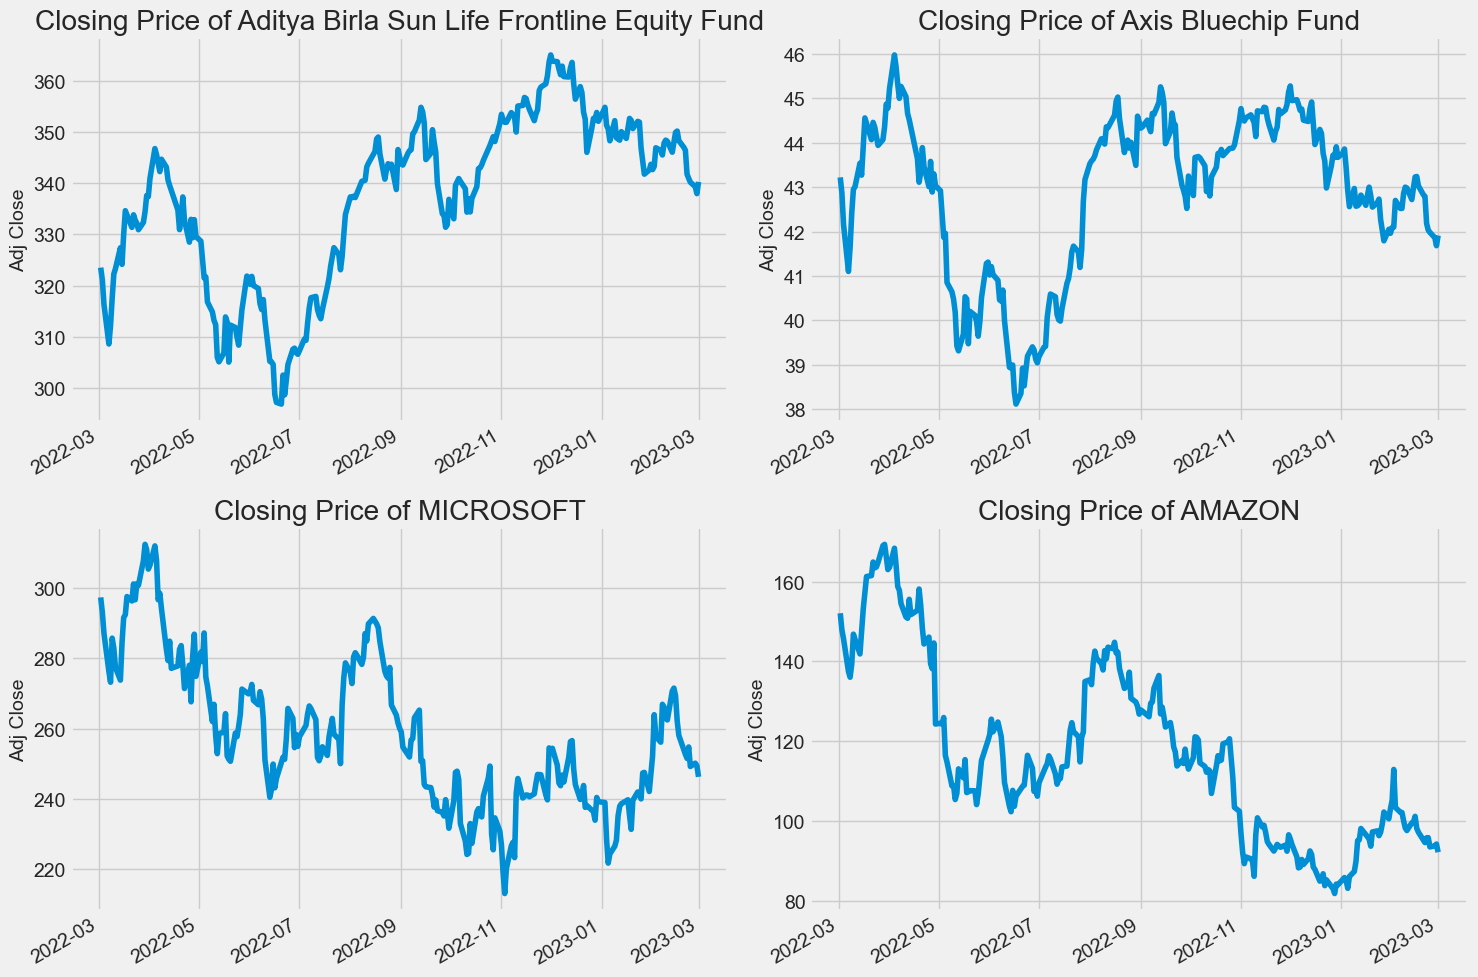

In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

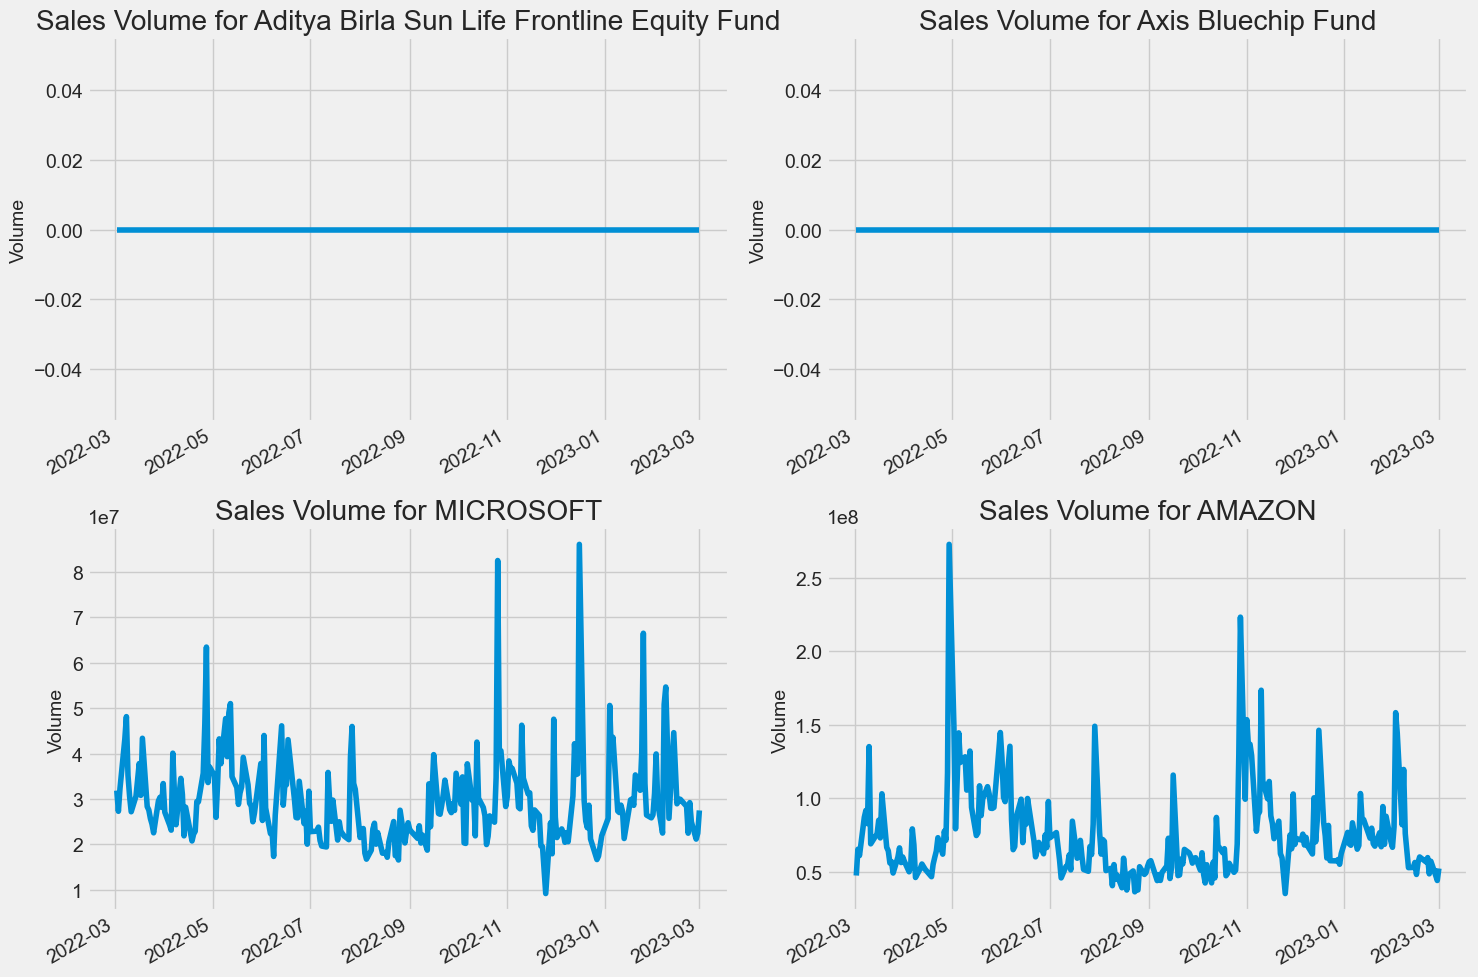

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

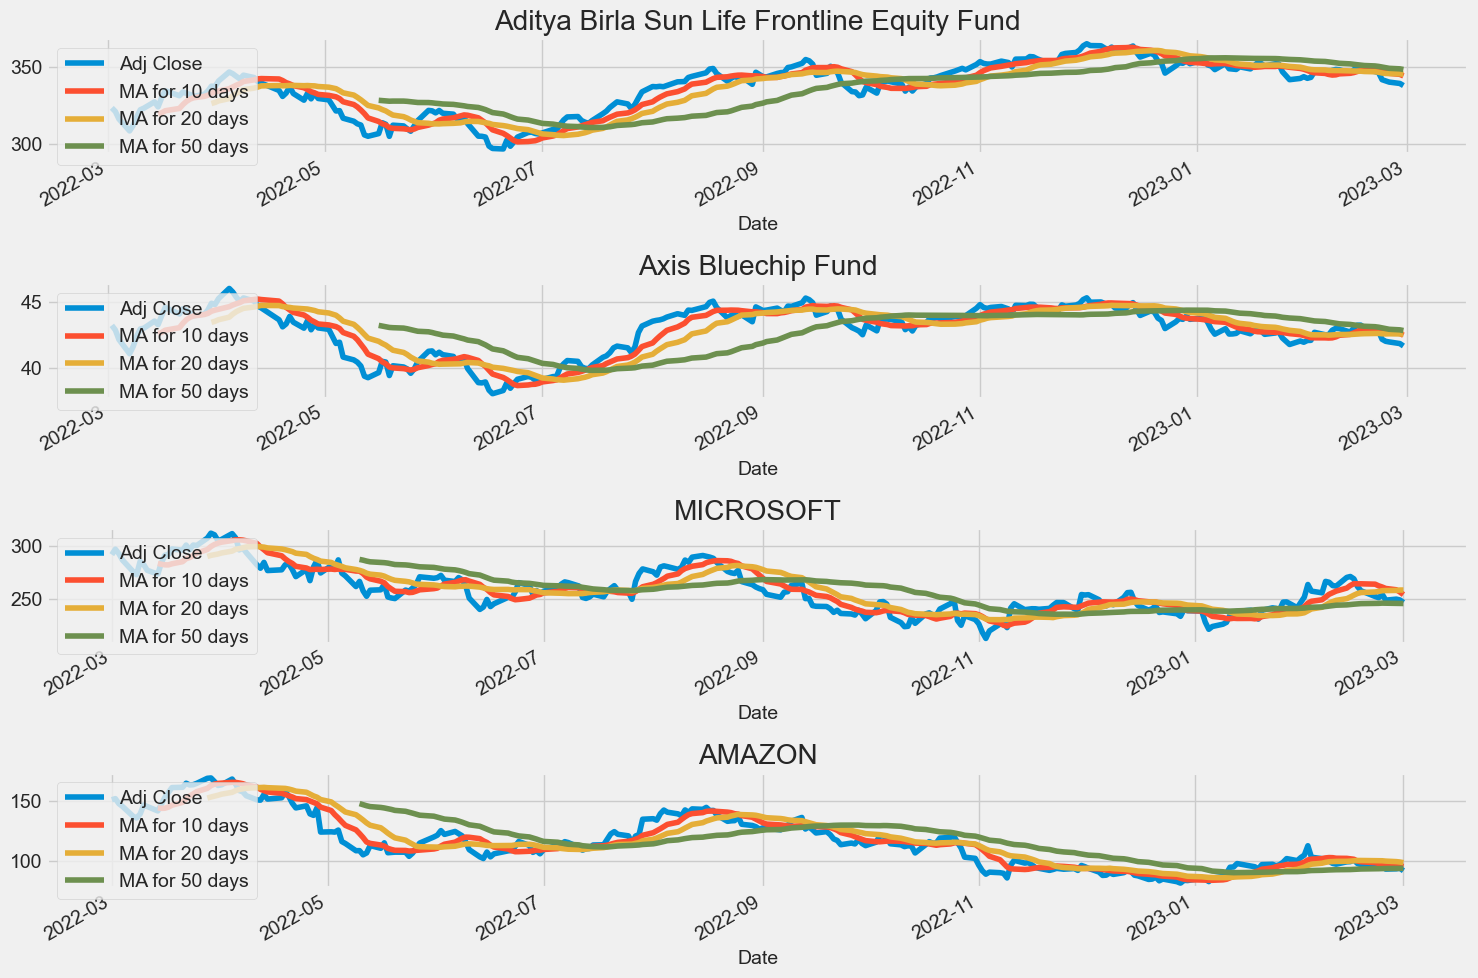

In [24]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=4)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_list, 1):
    company[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i-1])
    axes[i-1].set_title(company_name[i-1])
    

# AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
# axes[0,0].set_title('APPLE')

# GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
# axes[0,1].set_title('GOOGLE')

# MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
# axes[1,0].set_title('MICROSOFT')

# AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
# axes[1,1].set_title('AMAZON')

fig.tight_layout()
   

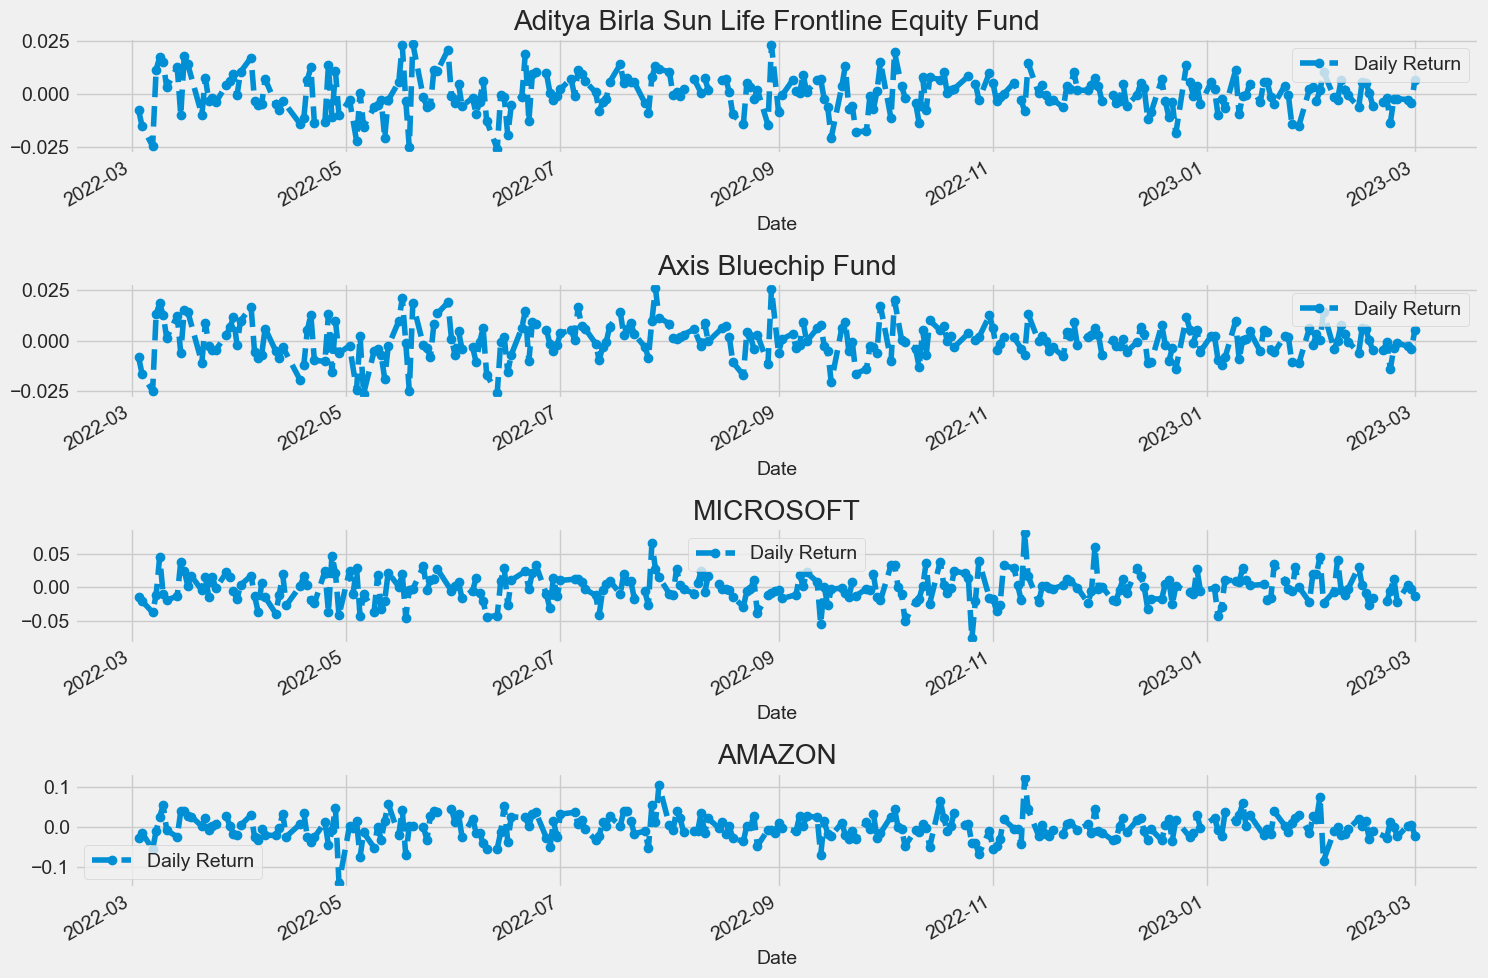

In [6]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=4)
fig.set_figheight(10)
fig.set_figwidth(15)


for i, company in enumerate(company_list, 1):
    company['Daily Return'].plot(ax=axes[i-1], legend=True, linestyle='--', marker='o')
    axes[i-1].set_title(company_name[i-1])
    
    
    
# AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
# axes[0,0].set_title('APPLE')

# GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
# axes[0,1].set_title('GOOGLE')

# MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
# axes[1,0].set_title('MICROSOFT')

# AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
# axes[1,1].set_title('AMAZON')

fig.tight_layout()

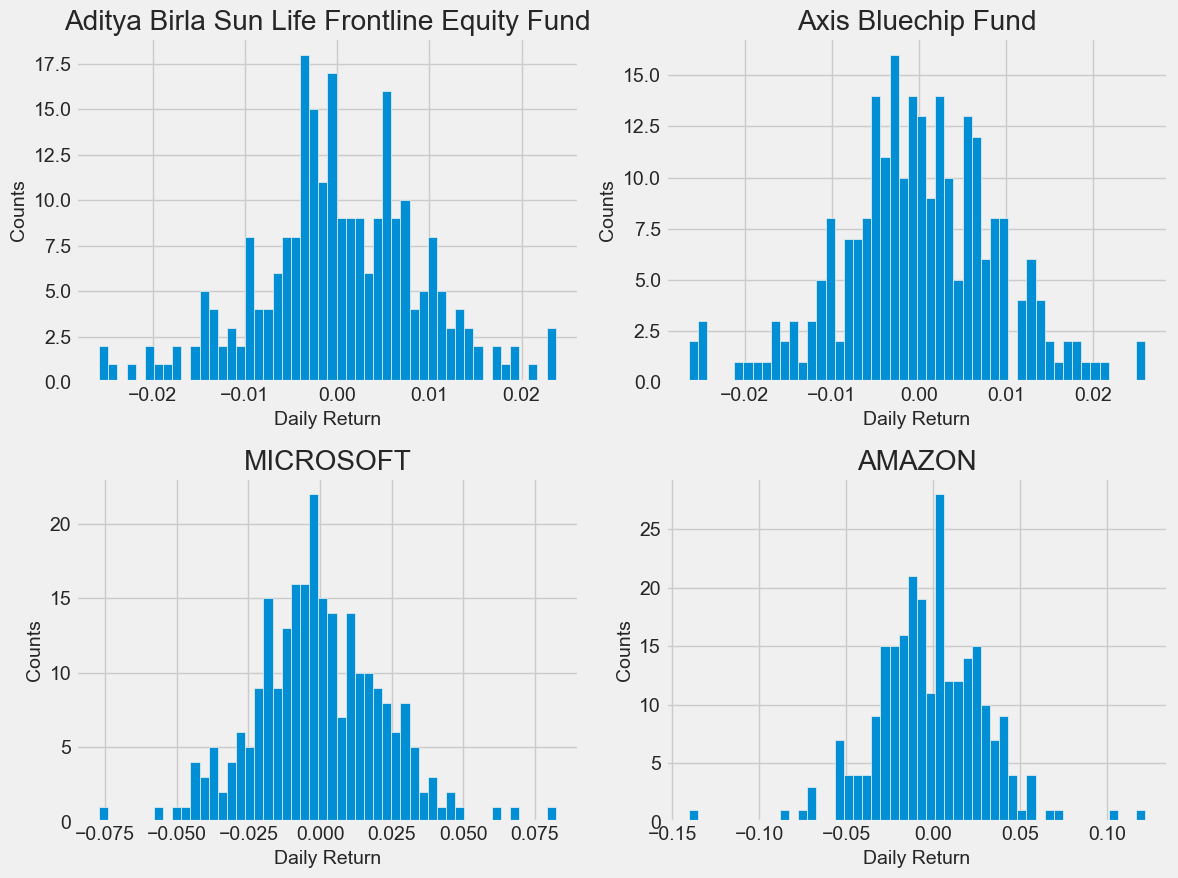

In [14]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [7]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,0P00005V63.BO,0P0000MLHH.BO,AMZN,MSFT
Date,,,,
2022-03-02,NaN,NaN,NaN,NaN
2022-03-03,-0.007295,-0.008098,-0.027320,-0.014224
2022-03-04,-0.015071,-0.016562,-0.015264,-0.020479
2022-03-07,-0.024406,-0.025142,-0.056220,-0.037777
2022-03-08,0.011536,0.013139,-0.010465,-0.010971


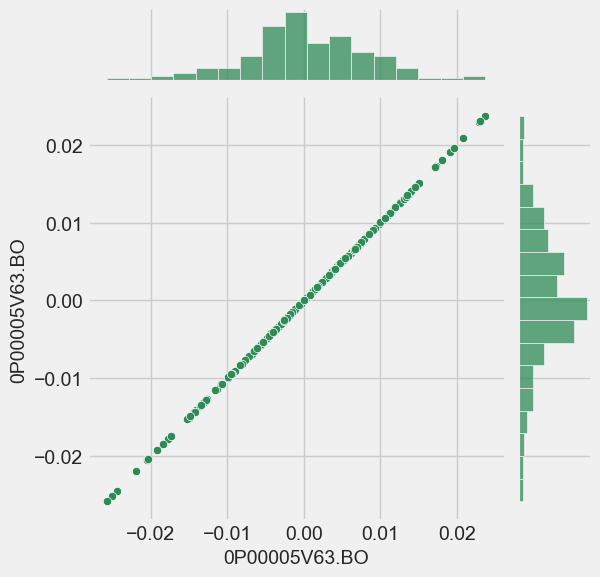

In [27]:
# Comparing Aditya Birla to itself should show a perfectly linear relationship
sns.jointplot(x='0P00005V63.BO', y='0P00005V63.BO', data=tech_rets, kind='scatter', color='seagreen')

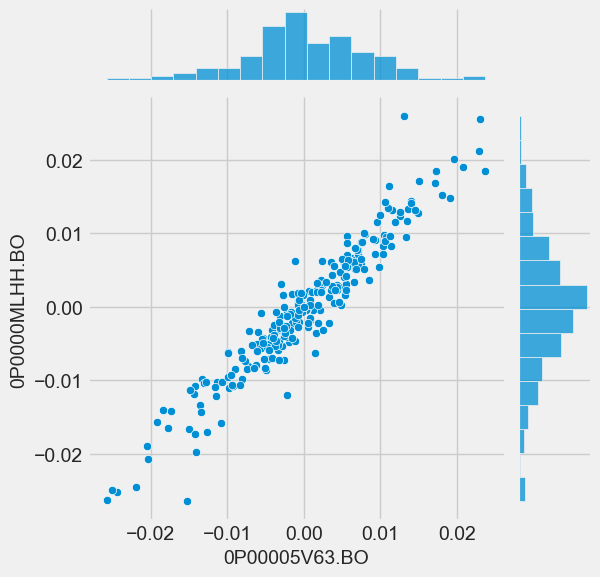

In [28]:
# We'll use joinplot to compare the daily returns of Aditya Birla Sun Life Frontline Equity Fund and Axis Bluechip Fund
sns.jointplot(x='0P00005V63.BO', y='0P0000MLHH.BO', data=tech_rets, kind='scatter')

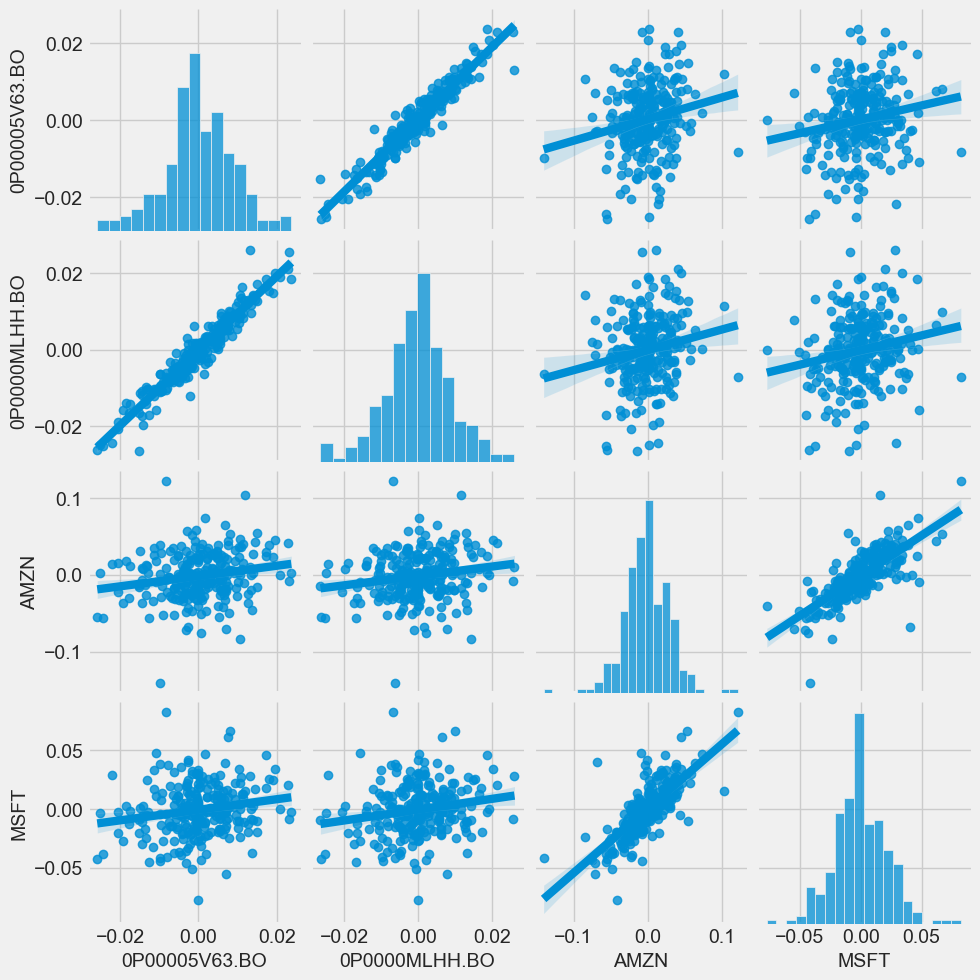

In [29]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

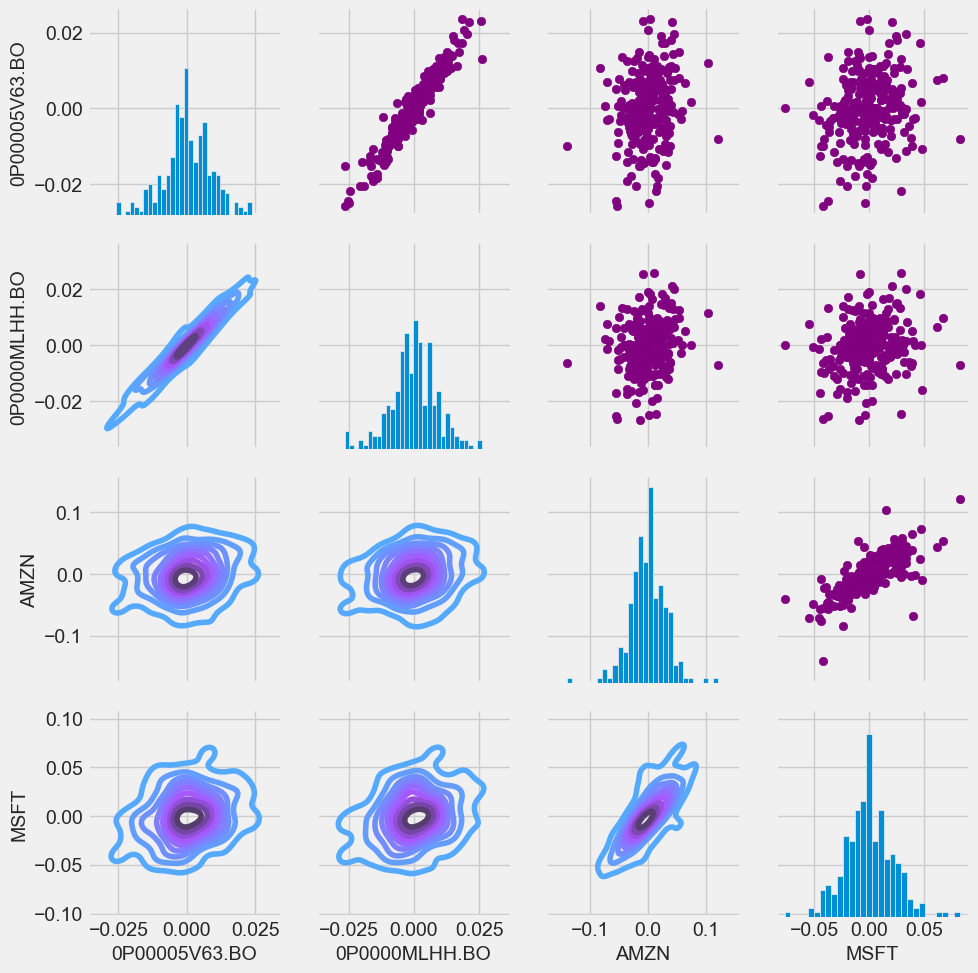

In [30]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

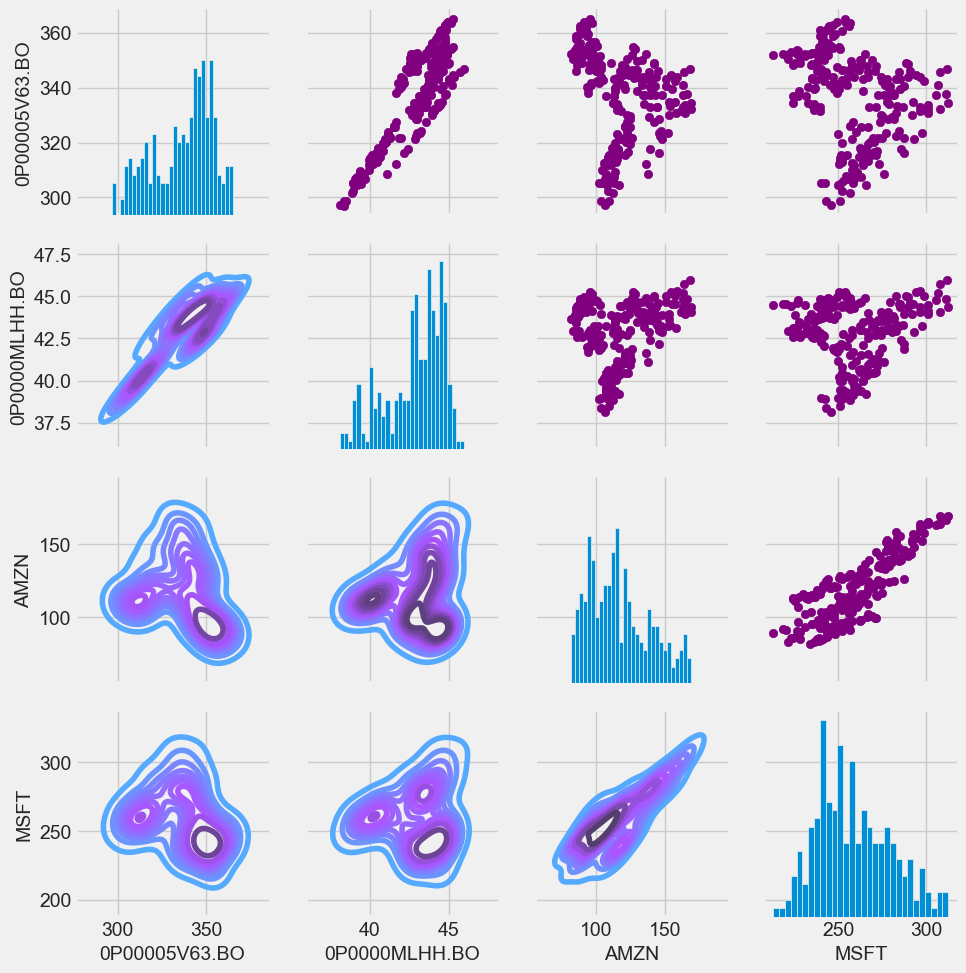

In [31]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

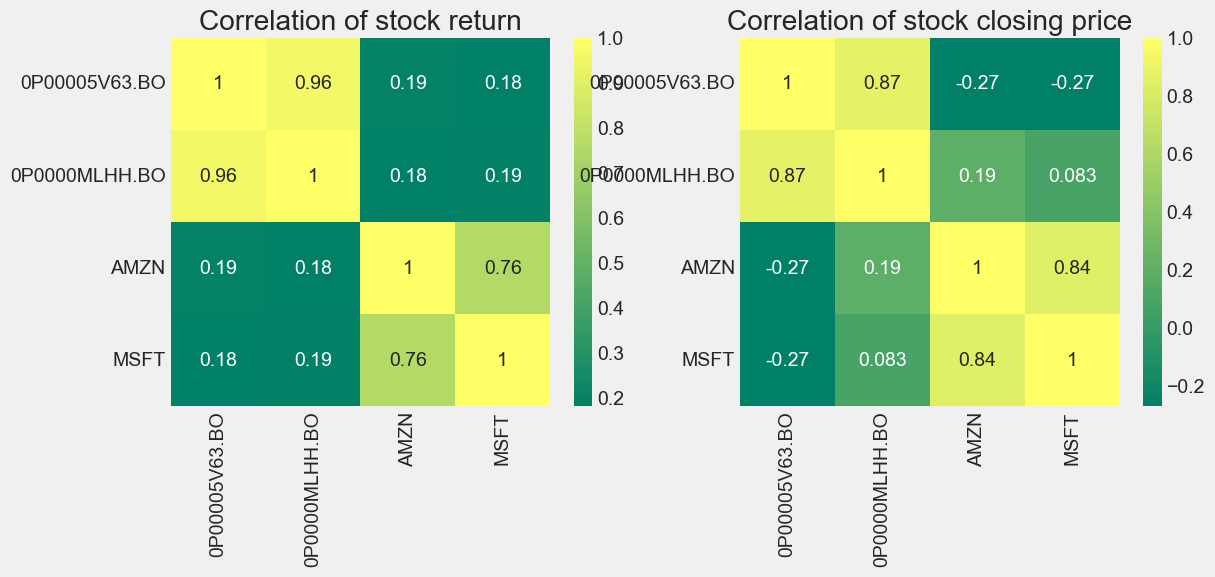

In [32]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

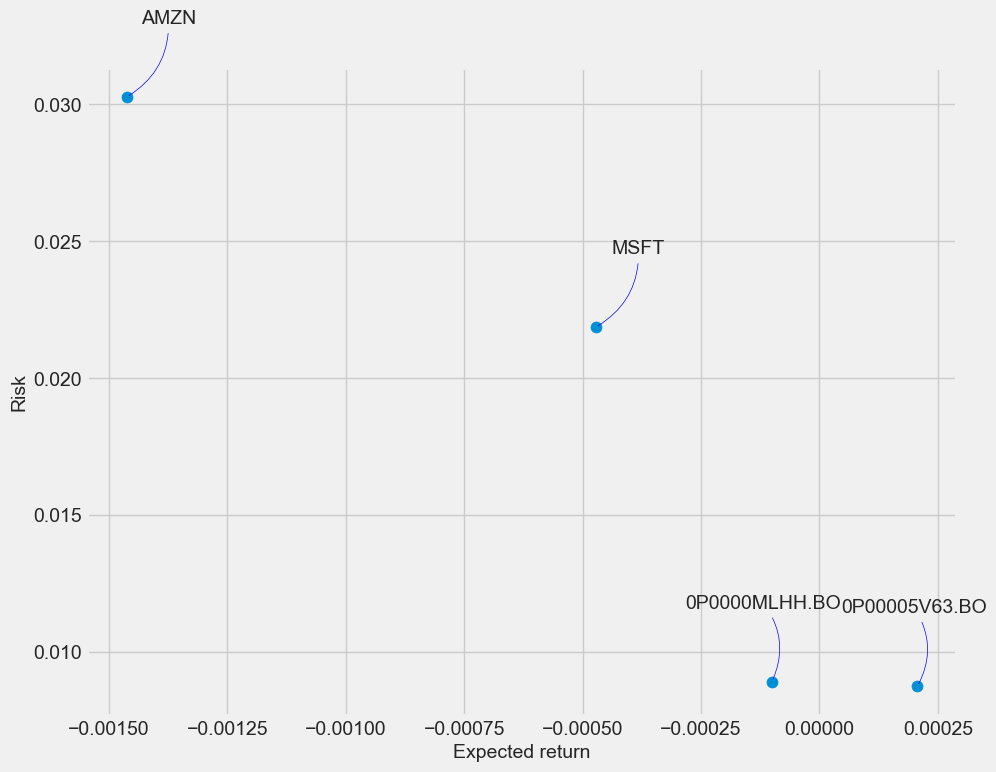

In [33]:
# How much value do we put at risk by investing in a particular stock?

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [23]:
# Predicting the closing price stock price of Aditya Birla Sun Life Frontline Equity Fund:

# Get the stock quote
# for i, company in enumerate(company_list, 1):
#     plt.subplot(2, 2, i)
#     company['Adj Close'].plot()
#     plt.ylabel('Adj Close')
#     plt.xlabel(None)
#     plt.title(f"Closing Price of {company_name[i - 1]}")
df = pdr.get_data_yahoo('0P00005V63.BO', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,221.289993,221.289993,221.289993,221.289993,221.289993,0
2018-01-02,221.029999,221.029999,221.029999,221.029999,221.029999,0
2018-01-03,221.169998,221.169998,221.169998,221.169998,221.169998,0
2018-01-04,222.740005,222.740005,222.740005,222.740005,222.740005,0
2018-01-05,224.020004,224.020004,224.020004,224.020004,224.020004,0
...,...,...,...,...,...,...
2023-02-23,340.940002,340.940002,340.940002,340.940002,340.940002,0
2023-02-24,340.190002,340.190002,340.190002,340.190002,340.190002,0
2023-02-27,339.320007,339.320007,339.320007,339.320007,339.320007,0


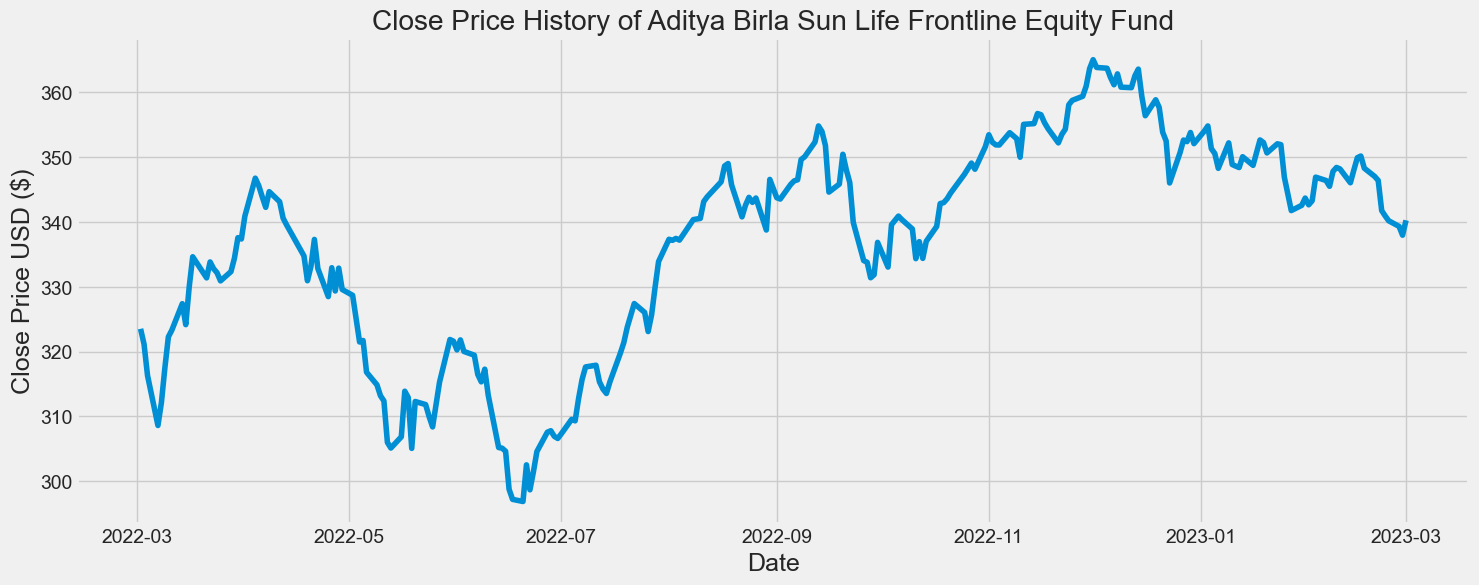

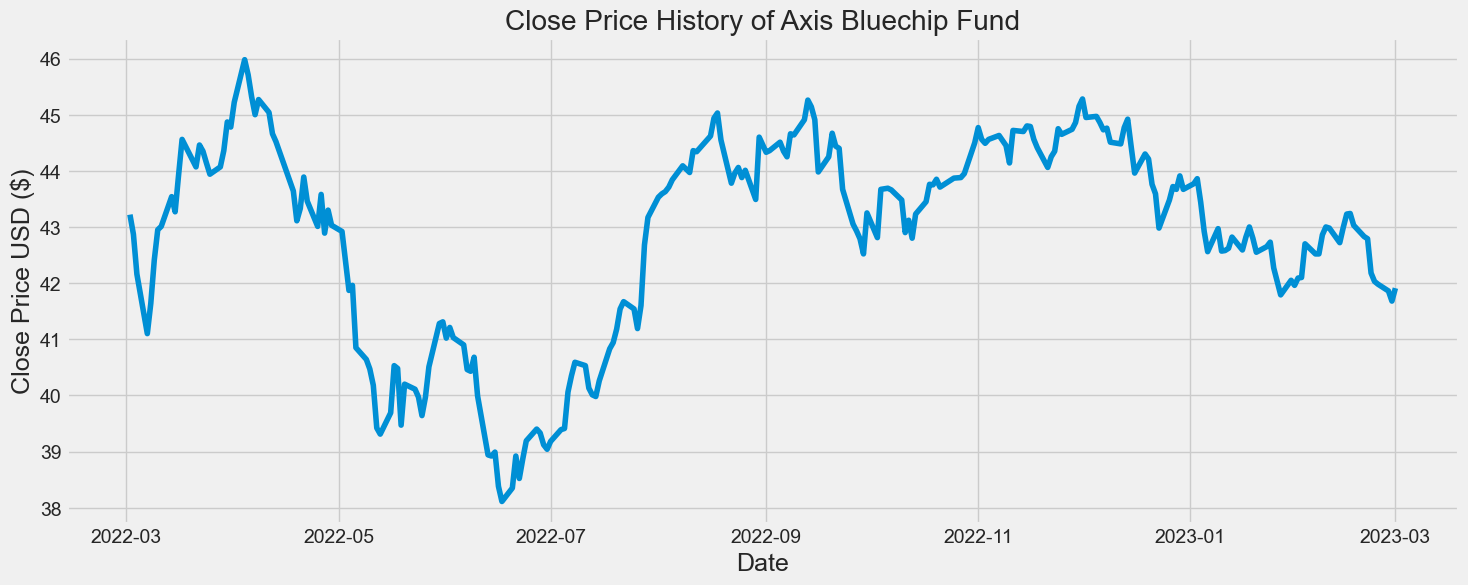

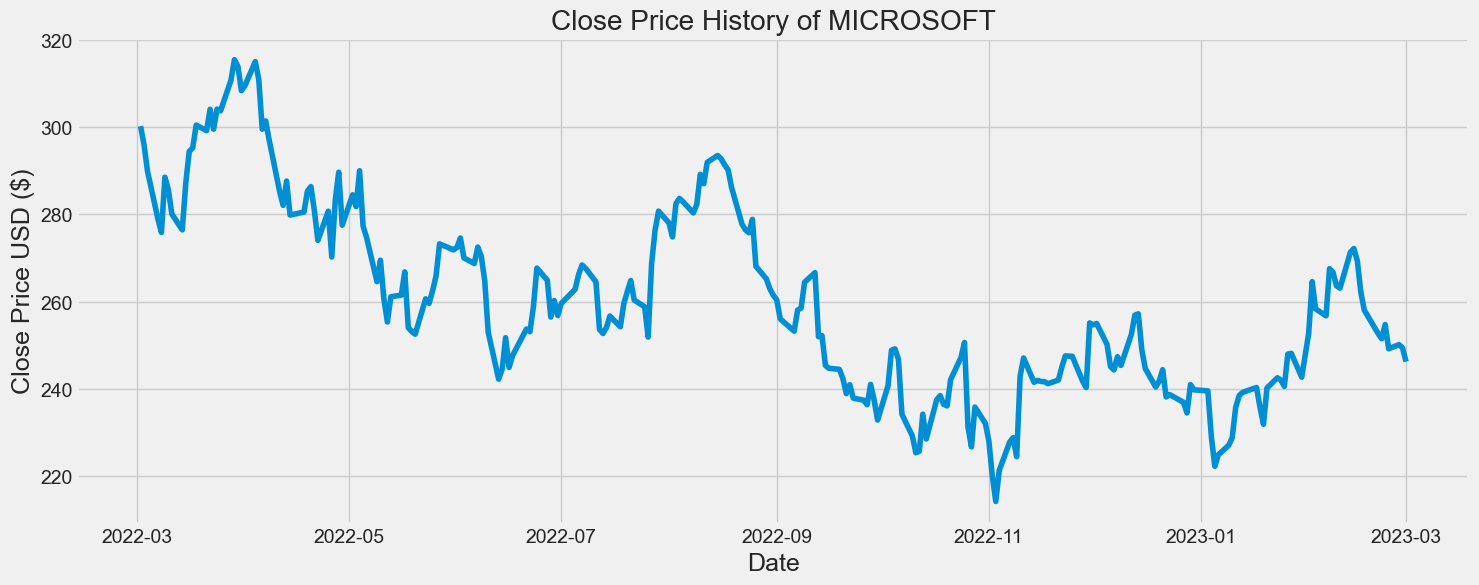

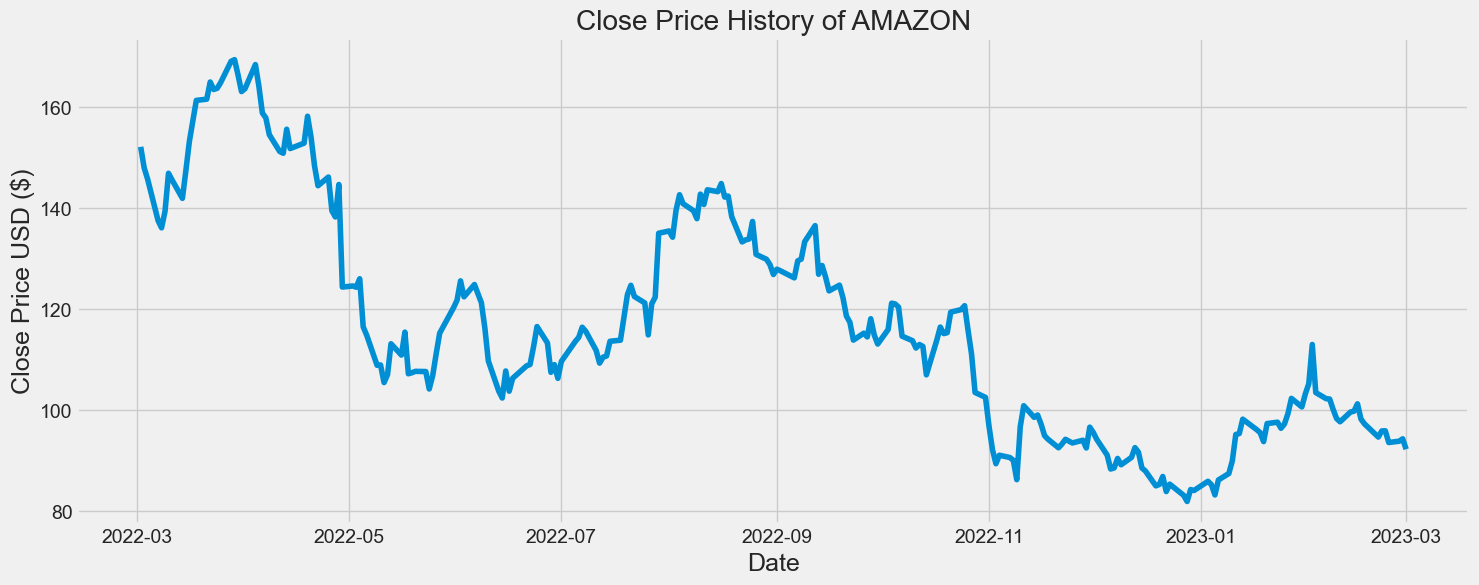

In [10]:
for i, company in enumerate(company_list, 1):
    plt.figure(figsize=(16,6))
    plt.title(f"Close Price History of {company_name[i - 1]}")
    plt.plot(company['Close'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.show()

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Scale the data
from sklearn.preprocessing import MinMaxScaler

for i, company in enumerate(company_list, 1):
    # Create a new dataframe with only the 'Close column 
    data = company.filter(['Close'])
    # Convert the dataframe to a numpy array
    dataset = data.values
    # Get the number of rows to train the model on
    training_data_len = int(np.ceil( len(dataset) * .95 ))
    print(company_name[i-1])
    print(training_data_len)
    print("\n")
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    # scaled_data
    # Create the training data set 
    # Create the scaled training data set
    train_data = scaled_data[0:int(training_data_len), :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
        if i<= 61:
            ko=1
            #print(x_train)
            #print(y_train)
            #print()

    # Convert the x_train and y_train to numpy arrays 
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    # x_train.shape

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    # Create the testing data set
    # Create a new array containing scaled values from index 1543 to 2002 
    test_data = scaled_data[training_data_len - 60: , :]
    # Create the data sets x_test and y_test
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    # Convert the data to a numpy array
    x_test = np.array(x_test)

    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    # Get the models predicted price values 
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    print("Root mean square error - ")
    print(rmse)
    print(" . \n")

Aditya Birla Sun Life Frontline Equity Fund
1210


2/2 [==============================] - 1s 49ms/step
Root mean square error - 
8.875867268756352
 . 

Axis Bluechip Fund
1210


2/2 [==============================] - 2s 85ms/step
Root mean square error - 
0.42085527067495665
 . 

MICROSOFT
2668


5/5 [==============================] - 1s 56ms/step
Root mean square error - 
8.76127457110991
 . 

AMAZON
2668


5/5 [==============================] - 1s 47ms/step
Root mean square error - 
4.419057693411013
 . 



C:\Users\mithu\AppData\Local\Temp\ipykernel_22140\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


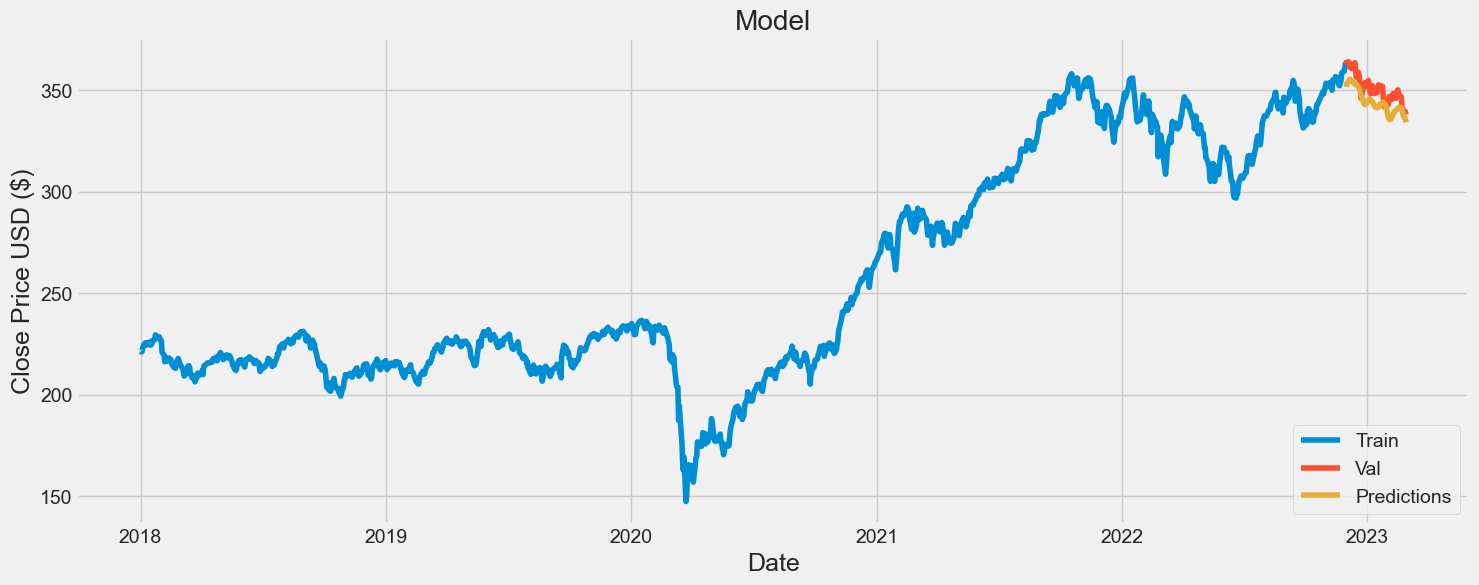

In [47]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [48]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-12-01,365.049988,351.607635
2022-12-02,363.850006,353.337158
2022-12-05,363.730011,354.574097
2022-12-06,362.299988,355.310547
2022-12-07,361.179993,355.384491
...,...,...
2023-02-22,341.760010,340.636597
2023-02-23,340.940002,339.180939
2023-02-24,340.190002,337.422150
